<center>
<img src="http://www.dallard.tech/file/logo1.png" style="float:left; max-width: 120px; display: inline" alt="Dallard Consulting"/> 
</center>

# Apprentissage Statistique / Machine avec <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> & <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 180px; display: inline" alt="Scikit-Learn"/></a>
**Petit résumé**: Ce notebook introduit l'utilisation de la librairie `scikit-learn` pour la modélisation et l'apprentissage. Pourquoi utiliser `scikit-learn` ? Ou non ? Liste des fonctionnalités, quelques exemples de mise en oeuvre de modélisation régression logistique, $k$-plus proches voisins, arbres de décision, forêts aléatoires.On vera aussi l'optimisation des paramètres (complexité) des modèles par validation croisée, les fontions de chaînage (*pipeline*) de transformations et estimations. D'autres fonctionalités de `Scikit-learn` sont abordées dans les prochains cours. 


**Avertissement :** Ce notebook est plutôt technique, pas de problème si vous ne comprenez pas tout directement dès la première lecture prenez le temps de le lire 'oklm' !  

## 1 Introduction
### 1.1 Scikit-learn basic 
L'objectif de ce notebook est d'introduire l'utilisation de la librairie `scikit-learn` de Python. Seule l'utilisation directe des fonctions de modélisation sont abordées. Petit rappel générique de `scikit-learn`. 

- Cette librairie manipule des objets de classe `array` de `numpy` *chargés en mémoire* et donc de taille limitée par la RAM de l'ordinateur; de façon analogue R charge en RAM des objets de type `data.frame`.
- `Scikit-learn` reconnaît quelque fois la classe `DataFrame` de `pandas`. Une variable binaire est simplement remplacée par un codage *(0,1)* mais, en présence de plusieurs modalités, traiter celles-ci comme des entiers n'a pas de sens statistique et remplacer une variable qualitative par l'ensemble des indicatrices (*dummy variables (0,1)*) de ses modalités  complique les stratégies de sélection de modèle tout en rendant inexploitable l'interprétation statistique. 
- Les implémentations en Python de certains algorithmes dans `scikit-learn` sont souvent rapide et utilisent implicitement les capacités de parallélisation.


### 1.2 Fonctions d'apprentissage de Scikit-learn
La communauté qui développe cette librairie est très active et la fait évoluer très rapidement.  Ne pas hésiter à consulter la [documentation](http://scikit-learn.org/stable/user_guide.html) pour des compléments. Voici une sélection de ses principales fonctionnalités en lien avec la modélisation : 

- Transformations (standardisation, discrétisation binaire, regroupement de modalités, imputations rudimentaires de données manquantes) , "vectorisation" de corpus de textes (encodage, catalogue, Tf-idf), images;
- Modéle linéaire général avec pénalisation (ridge, lasso, elastic net...), analyse discriminante linéaire et quadratique,  $k$ plus proches voisins,  processus gaussiens, classifieur bayésien naïf, arbres de régression et classification (CART), agrégation de modèles (bagging, random forest, adaboost, gradient tree boosting), perceptron multicouche (réseau de neurones), SVM (classification, régression, détection d'atypiques...);
- Algorithmes de validation croisée (loo, k-fold, VC stratifiée...) et sélection de modèles, optimisation sur une grille de paramètres, séparation aléatoire apprentissage et test, courbe ROC;
- Enchaînement (*pipeline*) de traitements.

En résumé, cette librairie est focalisée sur les aspects "machine" de l'apprentissage de données quantitatives (séries, signaux, images) volumineuses. 

### 1.3 Objectif 
Illustrer la mise en oeuvre de quelques fonctionnalités ainsi que apprendre à consulter la [documentation](http://scikit-learn.org/stable/user_guide.html) et ses nombreux [exemples](http://scikit-learn.org/stable/auto_examples/index.html) pour plus de détails sur les possibilités d'utilisation de `scikit-learn`. 

Deux jeux de données élémentaires sont utilisés, des variables explicatives qualitatives et quantitatives généralement dans un objet de la classe `DataFrame`. Pour être utilisé dans `scikit-learn` les données doivent souvent être transformées en un objet de classe `Array` de `numpy` par le  remplacement des variables qualitatives par les indicatrices de leurs modalités.  On peut aussi noterun autre ensemble de données, lui entièrement quantitatif. C'est un problème classique et simplifié de [reconnaissance de caractères](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) qui est inclus dans la librairie `scikit-learn`.


## 2 Extraction des échantillons
Le travail préliminaire consiste à séparer les échantillons en une partie *apprentissage* et une autre de *test* pour estimer sans biais l'[erreur de prévision](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf). L'optimisation (biais-variance) de la complexité des modèles est réalisée en minimisant l'erreur estimée par [validation croisée](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf) $V-fold$. 

### 2.1 Données "Caractères"
Elles sont disponibles dans la librairie `Scikit-learn`.

In [1]:
# Importations 
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
# les données
digits = datasets.load_digits()
# Contenu et mode d'obtention
print(digits)

{'data': array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ..

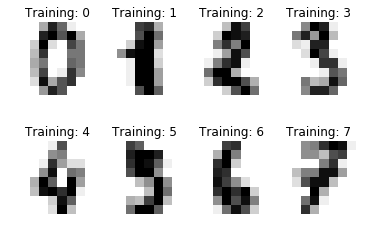

In [2]:
images_and_labels = list(zip(digits.images, 
   digits.target))
for index, (image, label) in  enumerate(images_and_labels[:8]):
     plt.subplot(2, 4, index + 1)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Training: %i' % label)

In [3]:
# variables prédictives et cible
X=digits.data
y=digits.target

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=11)

### 2.2 Données "Titanic"

Les données sur le naufrage du Titanic sont décrites dans le calepin consacré à la librairie *pandas*. Reconstruire la table des données en lisant le fichier .csv.

In [5]:
# Lire les données d'apprentissage
import pandas as pd
path='./dataset/'  # si les données sont déjà dans le répertoire courant SINON metter le bon chemin 
# path='http://www.math.univ-toulouse.fr/~besse/Wikistat/data/'
df=pd.read_csv(path+'titanic-train.csv',skiprows=1,header=None,usecols=[1,2,4,5,9,11],
  names=["Surv","Classe","Genre","Age","Prix","Port"],dtype={"Surv":object,"Classe":object,"Genre":object,"Port":object})
df.head()

,Surv,Classe,Genre,Age,Prix,Port
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [6]:
df.shape # dimensions
# Redéfinir les types 
df["Surv"]=pd.Categorical(df["Surv"],ordered=False)
df["Classe"]=pd.Categorical(df["Classe"],ordered=False)
df["Genre"]=pd.Categorical(df["Genre"],ordered=False)
df["Port"]=pd.Categorical(df["Port"],ordered=False)
df.dtypes

Surv      category
Classe    category
Genre     category
Age        float64
Prix       float64
Port      category
dtype: object

In [7]:
df.count()

Surv      891
Classe    891
Genre     891
Age       714
Prix      891
Port      889
dtype: int64

In [8]:
# imputation des valeurs manquantes
df["Age"]=df["Age"].fillna(df["Age"].median())
df.Port=df["Port"].fillna("S")

In [9]:
# Discrétiser les variables quantitatives
df["AgeQ"]=pd.qcut(df.Age,3,labels=["Ag1","Ag2","Ag3"])
df["PrixQ"]=pd.qcut(df.Prix,3,labels=["Pr1","Pr2","Pr3"])
# redéfinir les noms des modalités 
df["Surv"]=df["Surv"].cat.rename_categories(["Vnon","Voui"])
df["Classe"]=df["Classe"].cat.rename_categories(["Cl1","Cl2","Cl3"])
df["Genre"]=df["Genre"].cat.rename_categories(["Gfem","Gmas"])
df["Port"]=df["Port"].cat.rename_categories(["Pc","Pq","Ps"])
df.head()

,Surv,Classe,Genre,Age,Prix,Port,AgeQ,PrixQ
0,Vnon,Cl3,Gmas,22.0,7.2500,Ps,Ag1,Pr1
1,Voui,Cl1,Gfem,38.0,71.2833,Pc,Ag3,Pr3
2,Voui,Cl3,Gfem,26.0,7.9250,Ps,Ag2,Pr1
3,Voui,Cl1,Gfem,35.0,53.1000,Ps,Ag3,Pr3
4,Vnon,Cl3,Gmas,35.0,8.0500,Ps,Ag3,Pr1


In [10]:
#petite vérification 
df.count()

Surv      891
Classe    891
Genre     891
Age       891
Prix      891
Port      891
AgeQ      891
PrixQ     891
dtype: int64

### 2.3 Construction des échantillons d'entrainement et de test 

Le jeu de données (dit dataset) dont vous disposez constitue une **ressource précieuse**, il faut pouvoir l’utiliser à bon escient afin de pouvoir à la fois choisir un modèle et l'entraîner, mais aussi de pouvoir tester la qualité de ce modèle.

**La première question à se poser est : est-ce qu’on va utiliser toutes les données d'exemple dont on dispose ?**

En effet, s'il s’avère qu’on a beaucoup de données d’entraînement et/ou que l’algorithme d’apprentissage est lourd, il est possible qu’utiliser toutes les données prennent énormément de temps et/ou de ressources hardware. Dans ce cas, il faut naturellement échantillonner et ne récupérer qu’un petit pourcentage du dataset qui servira au travail de modélisation pour aller plus vite.
Pour minimiser ce problème, la meilleure approche est de séparer dès le départ notre jeu de données en deux parties distinctes :
- Le **training set**, qui va nous permettre d’entraîner notre modèle, et sera utilisé par l’algorithme d’apprentissage. 
- **Le testing set**, qui permet de mesurer l’erreur du modèle final sur des données qu’il n’a jamais vues. On va simplement passer ces données comme s'il s'agissait de données que l’on n'a encore jamais rencontrées (comme cela va se passer ensuite en pratique pour prédire de nouvelles données) et mesurer la performance de notre modèle sur ces données. 

En général, les données sont séparées avec les proportions suivantes : **80% pour le training set et 20% pour le testing set**. On peut cette fois utiliser la fonction de scikit-learn  `train_test_split` qui peut prendre en paramètre la proportion désirée. 

C'est donc dans cette optique que l'on va construire des indicatrices de variables descriptive. 

In [11]:
# Construction des indicatrices
df_q=df.drop(["Age","Prix"],axis=1)
df_q.head()
# Indicatrices
dc=pd.DataFrame(pd.get_dummies(df_q[["Surv","Classe","Genre","Port","AgeQ","PrixQ"]]))
dc.head()

,Surv_Vnon,Surv_Voui,Classe_Cl1,Classe_Cl2,Classe_Cl3,Genre_Gfem,Genre_Gmas,Port_Pc,Port_Pq,Port_Ps,AgeQ_Ag1,AgeQ_Ag2,AgeQ_Ag3,PrixQ_Pr1,PrixQ_Pr2,PrixQ_Pr3
0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0
1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1
2,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0
3,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0


In [12]:
# Table des indicatrices
df1=pd.get_dummies(df_q[["Surv","Classe","Genre","Port","AgeQ","PrixQ"]])
# Une seule indicatrice par variable binaire
df1=df1.drop(["Surv_Vnon","Genre_Gmas"],axis=1)
# Variables quantitatives
df2=df[["Age","Prix"]]
# Concaténation
df_c=pd.concat([df1,df2],axis=1)
# Vérification
df_c.columns

Index(['Surv_Voui', 'Classe_Cl1', 'Classe_Cl2', 'Classe_Cl3', 'Genre_Gfem',
       'Port_Pc', 'Port_Pq', 'Port_Ps', 'AgeQ_Ag1', 'AgeQ_Ag2', 'AgeQ_Ag3',
       'PrixQ_Pr1', 'PrixQ_Pr2', 'PrixQ_Pr3', 'Age', 'Prix'],
      dtype='object')

In [13]:
# Extraction des échantillons d'apprentissage et test
# variables explicatives
T=df_c.drop(["Surv_Voui"],axis=1)
# Variable à modéliser
z=df_c["Surv_Voui"]
# Extractions
from sklearn.model_selection import train_test_split
T_train,T_test,z_train,z_test=train_test_split(T,z,test_size=0.2,random_state=11)

**Attention**: l'échantillon test des données "Titanic" est relativement petit, l'estimation de l'erreur de prévision est donc sujette à caution car probablement de grande variance. Il suffit de changer l'initialisation (paramètre ` random_state`) et ré-exécuter les scripts pour s'en assurer. 

## Algorithme des *K* plus proches voisins
Les images des caractères sont codées par des variables  quantitatives. Le problème de reconnaissance de forme ou de discrimination est adapté à l'algorithme des  [$k$-plus proches voisins](https://fr.wikipedia.org/wiki/M%C3%A9thode_des_k_plus_proches_voisins). Le paramètre à optimiser pour contrôler la complexité du modèle est le nombre de voisin `n_neighbors`. Les autres options sont décrites dans la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 

Dans ce cadre, on dispose d’une base de données d'apprentissage (iris) constituée de $N$ couples « entrée-sortie ». Pour estimer la sortie associée à une nouvelle entrée $x$, la méthode des $k$ plus proches voisins consiste à prendre en compte (de façon identique) les $k$ échantillons d'apprentissage dont l’entrée est la plus proche de la nouvelle entrée $x$, selon une distance à définir. 

On va utiliser pour notre découverte le jeu de données *Iris* connu aussi sous le nom de Iris de Fisher est un jeu de données multivariées présenté en 1936 par Ronald Fisher dans son papier The use of multiple measurements in taxonomic problems comme un exemple d'application de l'analyse discriminante linéaire. 

In [14]:
import pandas as pd
# définition des nom de colône 
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('./dataset/iris.data', header=None, names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


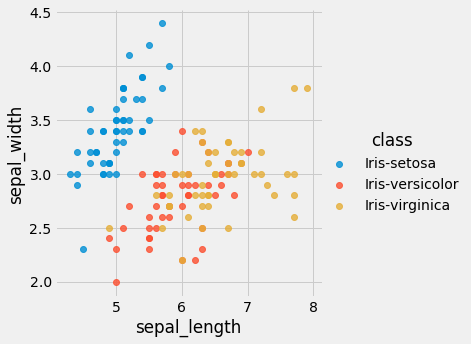

In [15]:
# Première visualisation des data 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# configuration d'un style 
plt.style.use('fivethirtyeight')
matplotlib.rc('font', family='DejaVu Sans') 
# plot
sns.lmplot('sepal_length', 'sepal_width', data=df, hue='class', fit_reg=False)
plt.show()

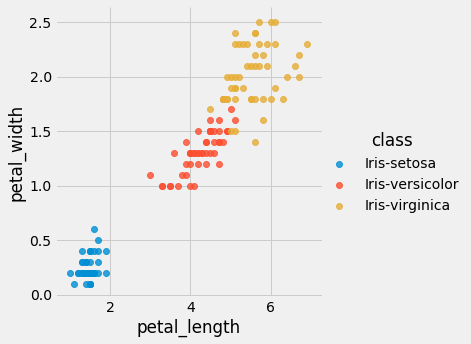

In [16]:
# autre plot
sns.lmplot('petal_length', 'petal_width', data=df, hue='class', fit_reg=False)
plt.show()

In [17]:
# création des dataset de test et d'entrainement 
from sklearn.model_selection import train_test_split
import numpy as np 
X = np.array(df.ix[:, 0:4]) 
y = np.array(df['class']) 
print('len de X et y : {}, {}'.format(len(X), len(y)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('** ** ** ** ** ** ** ** ** ** ** ** ** ** \nTaille des vecteurs : \nX_train {}, X_test {}, y_train {}, y_test {}'.format(len(X_train), len(X_test), len(y_train), len(y_test)))

len de X et y : 150, 150
** ** ** ** ** ** ** ** ** ** ** ** ** ** 
Taille des vecteurs : 
X_train 100, X_test 50, y_train 100, y_test 50


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [18]:
# Définition du classifieur 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=11)
# fit 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [19]:
# optimisation des hyperparamètres 
from sklearn.model_selection import cross_val_score

# création d'une liste de paramètres 
myList = list(range(1,64))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# stockage des valeurs 
cv_scores = []
cv_scores_std = []

# boucle de cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())
    

In [20]:
# calcul de MSE 
MSE = [1 - x for x in cv_scores]
# sélection du meilleur paramètre 
optimal_k = neighbors[MSE.index(min(MSE))]
# affichage 
print ('the optimal number of neighbors is {}'.format(optimal_k))

the optimal number of neighbors is 7


In [21]:
# évaluation de l'erreur de classification
cv_scores_for_test = []
# boucle de cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    cv_scores_for_test.append(accuracy_score(y_test, knn.predict(X_test)))
    
MSE_test = [1 - x for x in cv_scores_for_test]

In [22]:
# pour la variable [:2] 
cv_scores_for_test_0_2 = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:,:2], y_train)
    cv_scores_for_test_0_2.append(accuracy_score(y_test, knn.predict(X_test[:,:2])))
    
MSE_test_0_2 = [1 - x for x in cv_scores_for_test_0_2]

# pour la variable [2:4] 
cv_scores_for_test_2_4 = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:,2:4], y_train)
    cv_scores_for_test_2_4.append(accuracy_score(y_test, knn.predict(X_test[:,2:4])))
    
MSE_test_2_4 = [1 - x for x in cv_scores_for_test_2_4]

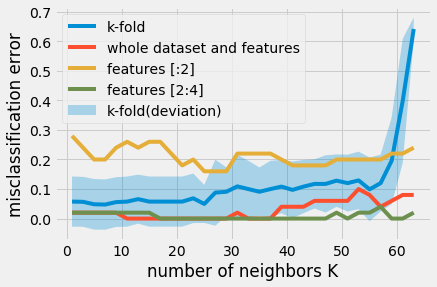

In [23]:
# plot 
plt.clf()
plt.plot(neighbors, MSE, label='k-fold')
cv_low = [x - x_std for x, x_std in zip(MSE, cv_scores_std)]
cv_hi = [x + x_std for x, x_std in zip(MSE, cv_scores_std)]
plt.fill_between(neighbors, cv_low, cv_hi, label='k-fold(deviation)', alpha=0.3)
plt.plot(neighbors, MSE_test, label='whole dataset and features')
plt.plot(neighbors, MSE_test_0_2, label='features [:2]')
plt.plot(neighbors, MSE_test_2_4, label='features [2:4]')
plt.xlabel('number of neighbors K')
plt.ylabel('misclassification error')
plt.legend()
plt.show()

In [24]:
import collections
# fonction afin de séléctionner l'ensemble d'entrainement 
def train(X_train, y_train):
    # do nothing
    return

# fonction de prédiction "from scratch"
def predict(X_train, y_train, x_test, k):
    # calcul de la distance euclidienne simple
    distances = [
        [np.sqrt(np.sum(np.square(x_test - x_train))), i] 
        for i, x_train in enumerate(X_train)
    ]        
    # triage
    distances = sorted(distances)
    # définition de la target 
    targets = [y_train[distance[1]] for distance in distances[:k]]
    # retourner les targets les plus proches 
    return collections.Counter(targets).most_common(1)[0][0]

def k_nearest_neighbour(X_train, y_train, X_test, k):
    train(X_train, y_train)    
    # boucles 
    return [predict(X_train, y_train, x_test, k) for x_test in X_test]

In [25]:
pred = k_nearest_neighbour(X_train, y_train, X_test, 1)
# transformation de la list en array 
pred = np.asarray(pred)
accuracy = accuracy_score(y_test, pred)
print("\nL'accuracy du classifieur est de : {}".format(accuracy))


L'accuracy du classifieur est de : 0.98


In [26]:
# évaluation de l'accuracy de l'algorithme 
pred = k_nearest_neighbour(X_train[:,:2], y_train, X_test[:,:2], 1)
# transformation de la list en array 
pred = np.asarray(pred)
# accuracy
accuracy = accuracy_score(y_test, pred)
print("\nL'accuracy du classifieur (sur les variables [:2]) est de : {}".format(accuracy))


L'accuracy du classifieur (sur les variables [:2]) est de : 0.78


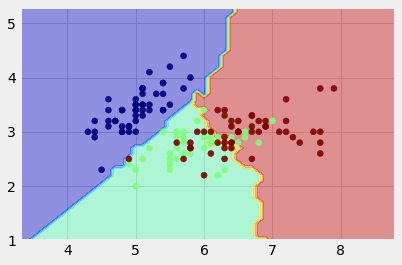

In [27]:
# région de décision 
from matplotlib import cm

def label_to_int(labels):
    return [list(set(labels)).index(y_value) for y_value in labels]

# choisir 2 variables
features_indexes = [0,1]

# plot des régions de decisions
x_min, x_max = X[:, features_indexes[0]].min() - 1, X[:, features_indexes[0]].max() + 1
y_min, y_max = X[:, features_indexes[1]].min() - 1, X[:, features_indexes[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train[:, features_indexes], y_train)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(label_to_int(Z))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cm.jet)
plt.scatter(X[:, features_indexes[0]], X[:, features_indexes[1]], c=[list(set(y)).index(y_value) for y_value in y], alpha=0.9, cmap=cm.jet)
plt.show()